# Analyse du RP111 et graphiques 2D

L'objectif de cet exemple est de présenter le problème 111 du BBRC. Nous présentons également des éléments graphiques pour la visualisation de la surface d'état limite en 2 dimensions.

In [1]:
import openturns as ot
import numpy as np
import otbenchmark as otb

In [2]:
problem = otb.ReliabilityProblem111()

In [3]:
event = problem.getEvent()
g = event.getFunction()

In [4]:
problem.getProbability()

7.65e-07

In [5]:
# Create the Monte-Carlo algorithm
algoProb = ot.ProbabilitySimulationAlgorithm(event)
algoProb.setMaximumOuterSampling(1000)
algoProb.setMaximumCoefficientOfVariation(0.01)
algoProb.run()

In [6]:
# Get the results
resultAlgo = algoProb.getResult()
neval = g.getEvaluationCallsNumber()
print("Number of function calls = %d" %(neval))
pf = resultAlgo.getProbabilityEstimate()
print("Failure Probability = %.4f" % (pf))
level = 0.95
c95 = resultAlgo.getConfidenceLength(level)
pmin=pf-0.5*c95
pmax=pf+0.5*c95
print("%.1f %% confidence interval :[%.4f,%.4f] " % (level*100,pmin,pmax))

Number of function calls = 1000
Failure Probability = 0.0000
95.0 % confidence interval :[0.0000,0.0000] 


## Dessiner les isovaleurs de la fonction d'état limite

In [7]:
inputVector = event.getAntecedent()
distribution = inputVector.getDistribution()
X1 = distribution.getMarginal(0)
X2 = distribution.getMarginal(1)
alphaMin = 0.00001
alphaMax = 1 - alphaMin
lowerBound = ot.Point([X1.computeQuantile(alphaMin)[0], X2.computeQuantile(alphaMin)[0]])
upperBound = ot.Point([X1.computeQuantile(alphaMax)[0], X2.computeQuantile(alphaMax)[0]])

## Print the iso-values of the distribution

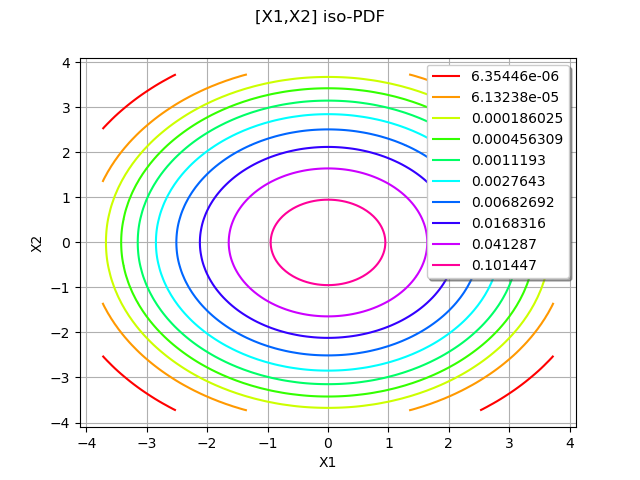

In [8]:
distribution.drawPDF()

In [9]:
sampleSize = 100000
sampleInput = inputVector.getSample(sampleSize)
sampleOutput = g(sampleInput)
drawEvent = otb.DrawEvent(event)


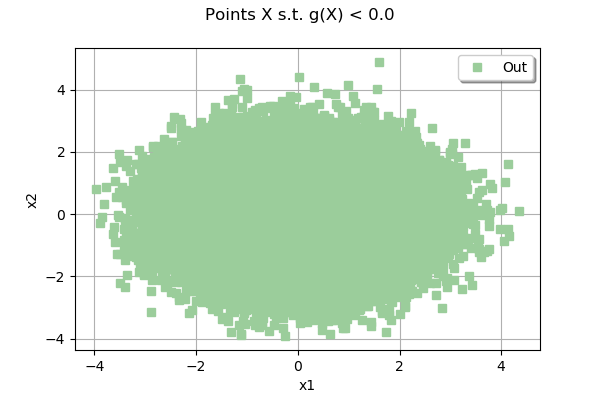

In [10]:
cloud = drawEvent.drawSample(sampleInput, sampleOutput)
cloud

## Draw the limit state surface

In [11]:
bounds = ot.Interval(lowerBound, upperBound)
bounds

class=Interval name=Unnamed dimension=2 lower bound=class=Point name=Unnamed dimension=2 values=[-4.26489,-4.26489] upper bound=class=Point name=Unnamed dimension=2 values=[4.26489,4.26489] finite lower bound=[1,1] finite upper bound=[1,1]

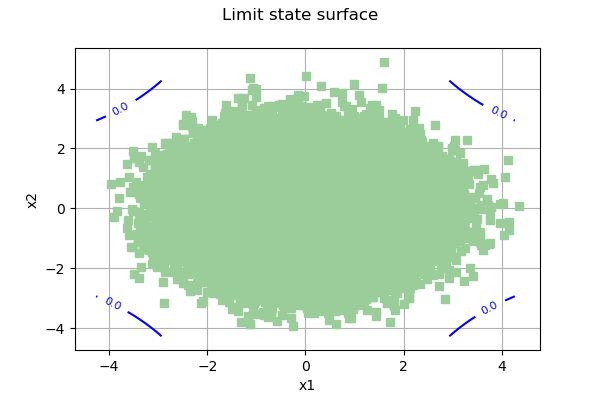

In [12]:
nX = 100
nY = 100
graph = drawEvent.drawLimitState(bounds, nX, nY)
graph.add(cloud)
graph

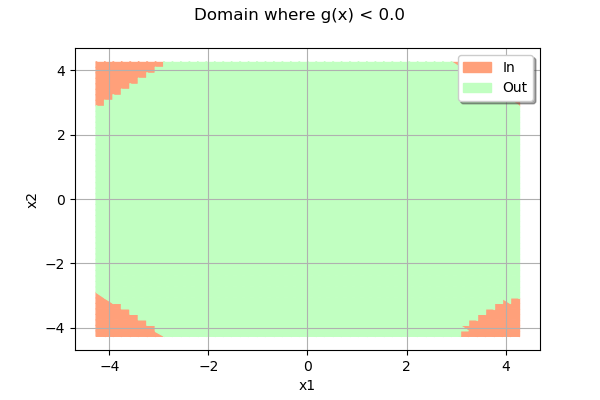

In [13]:
domain = drawEvent.fillEvent(bounds)
domain

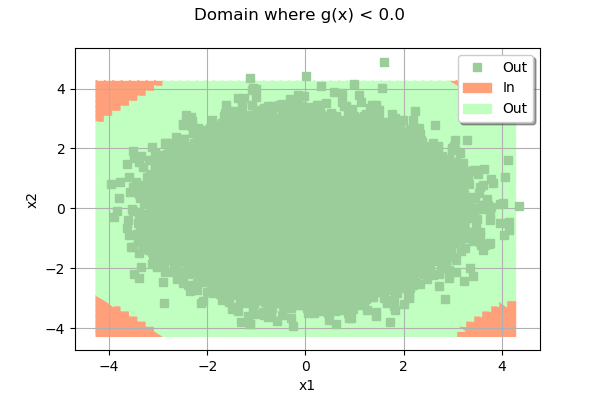

In [14]:
domain.add(cloud)
domain